<a href="https://colab.research.google.com/github/ivanrnarvaez/text_mining/blob/main/5_TextClassification_FeaturesAndLM_master_alumnos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
!{sys.executable} -m pip install contractions
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install numpy==1.26

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.1/62.1 kB 5.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.9/16.9 MB 34.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.1 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
‚úî Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
  Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency confl

In [3]:
!wget https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/datos_twitter_master.tsv

--2025-07-14 16:12:26--  https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/datos_twitter_master.tsv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/datos_twitter_master.tsv [following]
--2025-07-14 16:12:26--  https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/datos_twitter_master.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113587 (111K) [text/plain]
Saving to: ‚Äòdatos_twitter_master.tsv‚Äô

datos_twitter_maste 100%[===================>] 110.92K  --.-KB/s    in 0.02s   

2025-07-14 16:12:27 (6.97 MB/s) - ‚

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
!pip install datasets
!pip install evaluate
#pip install numpy==1.26

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.1/84.1 kB 2.9 MB/s eta 0:00:00


# Imports

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re
import contractions
from tqdm.autonotebook import tqdm
tqdm.pandas()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report

/tmp/ipython-input-4-379499608.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Cargar y preparar los datos


En primer lugar, descargaremos el conjunto de datos anotados. En este caso trabajaremos con documentos provenientes de la red social Twitter.

In [5]:
dataset = pd.read_csv('datos_twitter_master.tsv', sep='\t') # 'datos_twitter_master.tsv', sep = "\t"

# An√°lisis exploratorio de los datos (EDA)




En este apartado pretendemos realizar un an√°lisis de los datos previo a la normalizaci√≥n de los mismos. Este an√°lisis nos va a permitir extraer informaci√≥n relevante del dataset, as√≠ como posibles inconvenientes que ser√°n solucionados llegado el caso.


* **N√∫mero de documentos y columnas:**

Comenzamos mostrando el n√∫mero de documentos, o lo que es lo mismo, el n√∫mero de filas del data frame:

In [6]:
print("Tenemos un conjunto de {} documentos".format(len(dataset)))  # len(dataset)
print("El dataframe tiene {} columnas".format(dataset.shape[1]))  # dataset.shape[1]

Tenemos un conjunto de 1020 documentos
El dataframe tiene 2 columnas


* **N√∫mero de documentos duplicados:**

Despues, comprobamos y eliminamos las filas con alg√∫n valor vac√≠o (NA) y quitaremos los duplicados.

In [7]:
print("Existen {} documentos duplicadas".format(np.sum(dataset.duplicated(subset=["tweet_text"]))))  # dataset.duplicated(subset=["tweet_text"])

Existen 1 documentos duplicadas


In [8]:
# Quitaremos esos duplicados
dataset = dataset.drop_duplicates()
print("Despues de quitar duplicados tenemos un conjunto de {} documentos".format(dataset.shape[0]))

Despues de quitar duplicados tenemos un conjunto de 1019 documentos


Comprobaramos que no hayan quedado Nulls en ningunas de las dos columnas del dataset

In [9]:
print("Hay {} valores vac√≠os en los tweets y {} valores vac√≠os en las etiquetas en los datos".format(np.sum(dataset.isnull())[0],
                                                                                                        np.sum(dataset.isnull())[1]))

Hay 0 valores vac√≠os en los tweets y 0 valores vac√≠os en las etiquetas en los datos


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/tmp/ipython-input-9-1761462590.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Hay {} valores vac√≠os en los tweets y {} valores vac√≠os en las etiquetas en los datos".format(np.sum(dataset.isnull())[0],
/tmp/ipython-input-9-1761462590.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc

Si hubiera habido alg√∫n valor vac√≠o o null en la columna de etiquetas, habr√≠a que revisar si este error estaba relacionado con un error del documento original o por un problema en la lectura de los datos.  

* **N√∫mero de documentos por cada clase:**

Contamos el n√∫mero de elementos de cada clase, esto se hace f√°cilmente con un `groupby()` sobre la columna 'molestia' y un conteo de elementos posteriormente. Tambi√©n se podr√≠a utilizar el m√©todo `value_counts()` sobre la serie asociada a la categor√≠a asociada a los documentos.

En este caso nos encontramos dos categor√≠as para los documentos (tweets):

- "Molestia = 1": Tweets con la palabra ruido que hacen referencia a molestias sufridas por ruido ac√∫stico proveniente de distintas fuentes (coches, vecinos, mascotas,...)
- "Molestia = 0": Tweets que contienen la palabra ruido perso no expresan una molestia sufrida por el usuario que lo escribi√≥ (otras acpciones de ruido, noticias que hablan sobre ruido o uso de ruido como algo positivo)

In [10]:
print(dataset["molestia"].value_counts())

molestia
1    510
0    509
Name: count, dtype: int64


In [11]:
# N√∫mero de elementos de cada clase:
dataset.groupby(['molestia']).count()

tweet_text
molestia            
0                509
1                510

Viendo los resultados podemos observar que el conjunto de datos tiene las categor√≠as balanceadas. Esto nos evitar√° problemas en el entrenamiento de los modelos m√°s adelante.

Espec√≠ficamente contamos con 509 documentos con la categor√≠a '0' y 510 documentos con la categor√≠a '1'.



Vamos a dibujar un histograma con las clases para practicar la visualizaci√≥n y comunicaci√≥n de resultados:

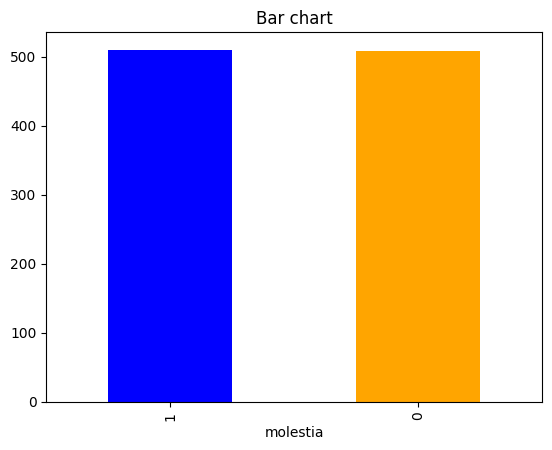

In [12]:
ax, fig = plt.subplots()
etiquetas = dataset.molestia.value_counts()
etiquetas.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

Llevar a cabo un an√°lisis exploratorio de los documentos es un proceso m√°s complejo que el an√°lisis llevado a cabo en datos num√©ricos debido a que la naturaleza no num√©rica del texto implica dificultades para el c√°lculo de estad√≠sticos t√≠picos como la media o desviaci√≥n t√≠pica.  En este ejercicio planteamos algunos m√©todos b√°sicos para llevar a cabo este an√°lisis exploratorio:


* **Distribuci√≥n de la longitud de los tweet en caracteres:**

Para seguir con el an√°lisis exploratorio, vamos a hacer un c√°lculo la longitud de cada uno de los textos de los documentos para posteriormente dibujar su histograma y ver diferencias entre las categor√≠as del dataset:

In [13]:
dataset["char_len"] = dataset["tweet_text"].apply(lambda x: len(x)) # lambda y len

<Figure size 1400x1200 with 0 Axes>

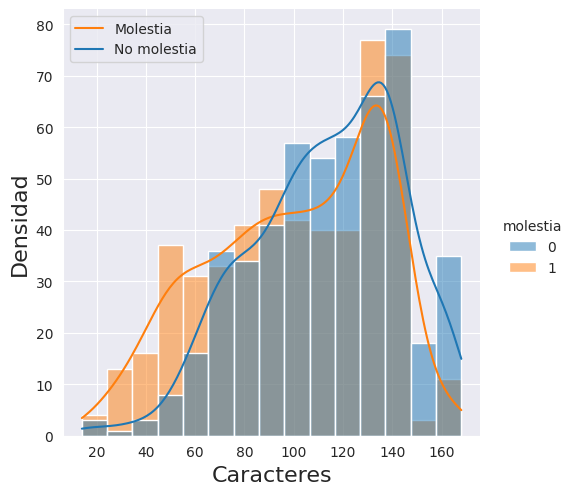

In [14]:
# Importamos las librer√≠as matplotlib y seaborn:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")

sns.displot(data=dataset, x="char_len", hue="molestia", kde=True, legend=True) # dataset
plt.legend(["Molestia", "No molestia"])
# Definimos el t√≠tulo de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gr√°fico:
plt.show()



En el caso de Twitter la mayor√≠a de documentos tienen una longitud muy reducida (menos de 200 caracteres). Comparando las longitudes de los documentos asociados a cada categor√≠a, se aprecia que los tweets que expresan 'molestia' tienen una longitud algo menor.

* **An√°lisis de contenido de los tweets**

Para llevar a cabo un an√°lisis del contenido de los tweets se podr√≠an optar por diferentes t√©cnicas. Desde el c√°lculo de t√©rminos m√°s frecuentes en cada una de las categor√≠as, a t√©cnicas m√°s complejas como el *Topic Modeling* (t√©cnica que veremos m√°s adelante en el m√≥dulo.  

En este caso utilizaremos una visualizaci√≥n conocida como **word cloud**, en la que se representa visualmente los t√©rminos m√°s frecuentes de un conjunto de textos, pero dando m√°s hincapi√© a los t√©rminos m√°s frecuentes en la visualizaci√≥n.

Para llevar a cabo esta visualizaci√≥n utilizaremos un recurso de sencilla utilizaci√≥n y personalizaci√≥n, la librer√≠a [wordcloud](https://amueller.github.io/word_cloud/)

Importamos el objeto WordCloud

In [15]:
from wordcloud import WordCloud

Para generar los gr√°ficos necesitamos obtener una variable de tipo `string` que contenga todos los textos con los que queremos llevar a cabo la visualizaci√≥n. En este caso obtendremos separadamente los tweets asociados a la categor√≠a 0 y a la categor√≠a 1.

In [16]:
txt_cat0 = ",".join(dataset[dataset.molestia==0].tweet_text.to_list()) # Nos quedamos con dataset.molestia==0
txt_cat1 = ",".join(dataset[dataset.molestia==1].tweet_text.to_list()) # Nos quedamos con dataset.molestia==0

Una vez obtenidos la variable de texto, crearemos un objeto `WordCloud` con la configuraci√≥n que nos permita obtener las visualizaciones

In [17]:
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english') # 'english'

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=0,
                      contour_color='steelblue', stopwords=en_stopwords,
                      normalize_plurals = True)

Una vez generado el objeto ya podemos utilizarlo para llevar a cabo la generaci√≥n y visualizaci√≥n del resultado

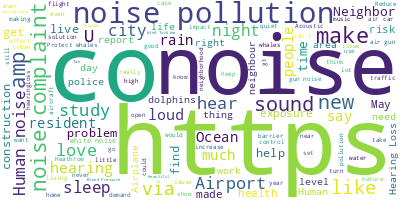

In [18]:
# Genera el wordcloud
wordcloud.generate(txt_cat0)
# Visualizalo en una imagen
wordcloud.to_image()

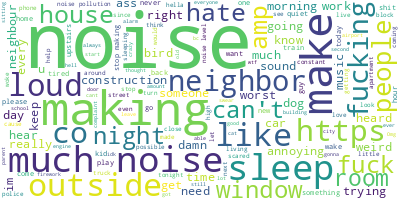

In [19]:
# Genera el wordcloud
wordcloud.generate(txt_cat1)
# Visualizalo en una imagen
wordcloud.to_image()

Observando los resultados, vemos los siguientes fen√≥menos:
  - En el wordcloud de la categor√≠a 0 se observa que hay una alta presencia de URLs (presencia de *https* y *co*), as√≠ como de la palabra *noise*. Son t√©rminos que no muestran opiniones a excepci√≥n de algunos adjetivos como *quiet* o *loud*.
  - En el wordcloud asociado a la categor√≠a 1 se observa una menor frecuencia del t√©rmino *https* (es decir que habr√° menos URLs en el contenido). Aparecen adjetivos que expresan opini√≥n y molestias como *fucking*, *make noise*, o *hate*.

En general, se obserban similitudes en los t√©mrinos m√°s presentes en ambos grupos (noise, https), pero varias diferencias en el resto del contenido.

Este tipo de visualizaci√≥n nos permite obtener ideas para modelar el problema posteriormente, incorporando caracter√≠sticas adicionales a las textuaels como el n√∫mero de adjetivos, el n√∫mero de URLs, o el sentimiento, como haremos en otro ejercicio.

# Entrenamiento con Ingenier√≠a de caracter√≠sticas:


## Transformaci√≥n
Como hemos visto, est√° dividido en dos pasos Normalizaci√≥n o Preprocesado y Transformaci√≥n



### Normalizaci√≥n
Vamos a proceder a normalizar los datos. Para ello vamos a generar peque√±as funciones que nos permitan:
- Eliminar espacios extra entre t√©rminos.
- Transformar a min√∫sculas.
- Reemplazar contracciones del ingl√©s.
- Normalizar URLs, menciones de twitter y n√∫meros por tokens comunes.
- Lematizar tokens, eliminar stopwords y eliminar s√≠gnos de puntuaci√≥n.


Este procedimiento lo haremos combinando la librer√≠a Spacy y otras librer√≠as


En primer lugar eliminaremos espacios extras del texto y transformaremos todos los caracteres a min√∫sculas:

In [20]:
# Eliminar espacios
def eliminar_espacios(text):
    return  " ".join(text.split())

# To lower
def texto_to_lower(text):
  return text.lower()

In [21]:
# Espacios y minuscula
dataset["normalized"] = dataset["tweet_text"].progress_apply(lambda x: eliminar_espacios(x))
dataset["normalized"] = dataset["normalized"].progress_apply(lambda x: texto_to_lower(x))

  0%|          | 0/1019 [00:00<?, ?it/s]

  0%|          | 0/1019 [00:00<?, ?it/s]

A continuaci√≥n normalizamos las contracciones y slang existentes en ingl√©s:

In [22]:
# Reemplazar contractions usando la librer√≠a "contractions" https://github.com/kootenpv/contractions
def replace_contraction(text):
    return contractions.fix(text, slang=True)

In [23]:
dataset["normalized"] = dataset["normalized"].progress_apply(lambda x: replace_contraction(x))

  0%|          | 0/1019 [00:00<?, ?it/s]

Depu√©s normalizamos URLs (tokens que comienzan por https:), menciones de twitter (tokens que comienzan por @) y n√∫meros. Aunque existen formas muy eficientes si se buscan patrones en el texto con una librer√≠a como `regex`, vamos a optar por tokenizar el documento, y en funci√≥n de las caracter√≠sticas del token sustiuiremos el token o lo dejaremos igual.

In [24]:
# Tokenizador
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

def normalizar_tokens(documento):
    # Dividir el documento en palabras
    palabras =  tweet_tokenizer.tokenize(documento) # tokenize(documento)

    # Reemplazar URLs, menciones de Twitter y n√∫meros por los tokens correspondientes
    for i in range(len(palabras)):
        if palabras[i].startswith("http://") or palabras[i].startswith("https://") or palabras[i].startswith("www."):
            palabras[i] = "URL"
        elif palabras[i].startswith("@"): #startswith "@"
            palabras[i] = "MENTION"
        elif palabras[i].isdigit(): # .isdigit()
            palabras[i] = "NUM"

    # Unir las palabras de nuevo en un documento modificado
    documento_modificado = ' '.join(palabras)

    return documento_modificado

In [25]:
dataset["normalized"] = dataset["normalized"].progress_apply(lambda x: normalizar_tokens(x))

  0%|          | 0/1019 [00:00<?, ?it/s]

In [26]:
dataset.normalized.to_list()

['noise harassment is a sensation pain based torture',
 'it is 4.30 am and we still have not slept because of the noise . i do not think i will ever be a city person haha',
 'these birds acting like i cannot grab my chainsaw & fall this damn tree . making all this fucking noise at NUM am . stfu a nigga is tryna sleep !',
 'why do people leave the annoying tap-tap keyboard noise on their phones ? they do not know how to turn it off w / o putting phone on silent ?',
 'please would you keep the noise down ? we are rehearsing in dartington üéª MENTION URL',
 'in chicago airport the MENTION is celebrating their first flight to cincinatti by giving out noise makers , fun people , fun company URL',
 'can hear a ticking noise in my house .. do not worry about it because it is just the clock ... NUM minutes later realising i have no ticking clock',
 'if my coworker makes a smacking noise on her tenth snack this morning one more time , i am going to lose my mind ! happy monday ? üôÑ üôÑ',
 "h

Por √∫ltimo llevamos a cabo la lematizaci√≥n y eliminaci√≥n de puntuaci√≥n y stopwords:

In [27]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lematizar_eliminacion_tokens(texto):
    # Procesar el texto con el objeto nlp
    doc = nlp(texto)

    # Lematizar el texto
    lemas = [token.lemma_ for token in doc]

    # Eliminar s√≠mbolos de puntuaci√≥n y stopwords
    tokens_filtrados = [token for token in lemas if token.isalpha() and token.lower() not in en_stopwords]

    # Unir los tokens filtrados en un nuevo texto
    texto_procesado = ' '.join(tokens_filtrados)

    return texto_procesado


In [28]:
dataset["preprocessed_text"] = dataset["normalized"].progress_apply(lambda x: lematizar_eliminacion_tokens(x))

  0%|          | 0/1019 [00:00<?, ?it/s]

Una vez procesado el texto, vamos a rehacer los word clouds para interpretar mejor el contenido de √©ste y visualizar el correcto funcionamiento del proceso:

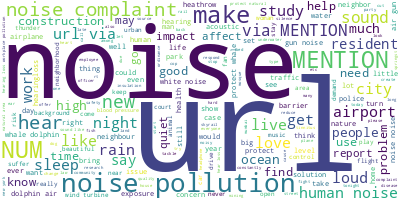

In [29]:
txt_cat0 = ",".join(dataset[dataset.molestia==0].preprocessed_text.to_list())
txt_cat1 = ",".join(dataset[dataset.molestia==1].preprocessed_text.to_list())
#
# Genera el wordcloud
wordcloud.generate(txt_cat0)
# Visualizalo en una imagen
wordcloud.to_image()

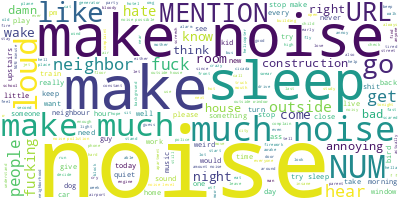

In [30]:
# Genera el wordcloud
wordcloud.generate(txt_cat1)
# Visualizalo en una imagen
wordcloud.to_image()

Una vez preprocesado, podr√≠amos calcular alguna caracter√≠stica adicional, como el n√∫mero de URLs o menciones:

In [31]:
def token_appearance(document, token = "MENTION"):
  return len([x for x in document.split() if x == token])

In [32]:
dataset["num_mention"] = dataset["preprocessed_text"].progress_apply(lambda x: token_appearance(x, token="MENTION"))
dataset["num_URLS"] = dataset["preprocessed_text"].progress_apply(lambda x: token_appearance(x, token="URL"))
dataset["num_NUM"] = dataset["preprocessed_text"].progress_apply(lambda x: token_appearance(x, token="NUM"))

  0%|          | 0/1019 [00:00<?, ?it/s]

  0%|          | 0/1019 [00:00<?, ?it/s]

  0%|          | 0/1019 [00:00<?, ?it/s]

In [33]:
  def count_adj(texto):
    doc = nlp(texto)
    adj = [token for token in doc if token.pos_ == "ADJ"]
    return len(adj)

In [34]:
dataset['num_ADJ'] = dataset["preprocessed_text"].progress_apply(lambda x: count_adj(x))

  0%|          | 0/1019 [00:00<?, ?it/s]

In [35]:
dataset.head()

tweet_text  molestia  char_len  \
0  Noise harassment is a sensation pain based tor...         1        50   
1  It's 4.30am and we still haven't slept because...         1       106   
2  These birds acting like I can't grab my chains...         1       143   
3  Why do people leave the annoying tap-tap keybo...         1       136   
4  Please would you keep the noise down? We're re...         1       109   

                                          normalized  \
0  noise harassment is a sensation pain based tor...   
1  it is 4.30 am and we still have not slept beca...   
2  these birds acting like i cannot grab my chain...   
3  why do people leave the annoying tap-tap keybo...   
4  please would you keep the noise down ? we are ...   

                                   preprocessed_text  num_mention  num_URLS  \
0       noise harassment sensation pain base torture            0         0   
1      still sleep noise think ever city person haha            0         0   
2  bird act like grab chainsaw fall damn tree mak...            0         0   
3  people leave annoying tap tap keyboard noise p...            0         0   
4  please would keep noise rehearse dartington ME...            1         1   

   num_NUM  num_ADJ  
0        0        0  
1        0        0  
2        1        1  
3        0        2  
4        0        1

### Vectorizacion del texto


Queremos que la funcionalidad 'TfidfVectorizer' tenga en cuenta los siguientes aspectos:

- Limitar el tama√±o de caracter√≠sticas del vector que representa el documento
- Considerar unigramas, bigramas y trigramas
- Que el sistema no considere los elementos que salgan en menos del 0.5% de los documentos.

In [36]:
vectorizador = TfidfVectorizer(lowercase=False, stop_words=None, ngram_range=(1,3), min_df=0.005)

In [37]:
vector_data = vectorizador.fit_transform(dataset['preprocessed_text']) # "preprocessed_text"

El resultado del proceso de vectorizaci√≥n nos devuelve vectores de tama√±o 375:

In [38]:
vector_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7188 stored elements and shape (1019, 372)>

#### Incorporaci√≥n de caracter√≠sticas adicionales

Previamente hemos calculado algunas caracter√≠sticas adicionales que podr√≠an ayudar al clasificador a tener mejor rendimiento. Vamos a incorporarlas a la representaci√≥n vectorial de los documentos.


La forma m√°s sencilla de hacer esto es utilizar la librer√≠a *scipy* y generar una matriz sparse, comprensible por scikit-learn, que contenga tanto las caracter√≠sticas de TFIDF como las calculadas manualmente.

En primer lugar, debemos seleccionar el conjunto de variables que queremos considerar en el entrenamiento. PAra ello hacemos uso del selector `dataframe[["nombre_columna1", "nombre_columna2"]]`:



In [39]:
extra_features = dataset[['num_mention','num_URLS','num_NUM', 'num_ADJ']] #'num_mention','num_URLS','num_NUM'

In [40]:
vector_data.dtype

dtype('float64')

Utilizamos la librer√≠a scipy (funci√≥n sparse.hstack) para unir las caracter√≠sticas TFIDF (contenidas en ¬¥vector_data¬¥) con las que acabamos de seleccionar (¬¥extra_features¬¥). Esta uni√≥n nos generar√° una matriz X que utilizaremos para hacer el train-test split posteriormente:

In [41]:
import scipy as sp
# Extraemos las etiquetas y las asignamos a la variable y
y = dataset["molestia"].values.astype(np.float32)
# Unimos las caracter√≠sticas TFIDF con las caracter√≠sticas previamente seleccionadas
# Extraemos los valores (values) de las extra_features, que es un dataframe
X = sp.sparse.hstack((vector_data,extra_features.values),format='csr')

In [42]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8229 stored elements and shape (1019, 376)>

Tambi√©n vamos a extraer el nombre de las caracter√≠ticas por si quisieramos utilizarlos con posterioridad.

In [43]:
X_columns=list(vectorizador.get_feature_names_out())+extra_features.columns.tolist()

## Entrenar/validar el clasificador:

Entramos ya en el apartado de entrenamiento del modelo.

Contamos con un conjunto de caracter√≠sticas predictoras extra√≠das del texto (variable X), y las categor√≠as asignadas manualmente en el conjunto de datos (y).

In [44]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8229 stored elements and shape (1019, 376)>

Tenemos 378 caracter√≠sticas para 1019 documentos.

En primer lugar, dividamos el dataset en Train/Test, definiendo un random_state para mantener la repetibilidad:

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0,
                                                    stratify = y, test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(917, 376)
(102, 376)


**Decision de modelo de ML a utilizar**

En primer lugar se ha generado una funci√≥n para medir la calidad de varios modelos est√°ndar de forma f√°cil y ver sus resultados.

La funci√≥n hace un KFold y evalua diferentes modelos con una m√©trica de evblauaci√≥n:

In [46]:
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
# Definimos la funci√≥n encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore')
          # Generamos un StratifiedKFold
          KF = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 98)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)

          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)

          # Mostramos los resultados num√©ricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

Una vez definida la funci√≥n, podemos definir los modelos con los que hacer la evaluaci√≥n. En este caso hemos incorporado la regresi√≥n log√≠stica y una naive bayes.

In [47]:
# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
         ("Logistic",LogisticRegression(random_state=30)), # LogisticRegression(random_state=30)
         ("GaussianNB",GaussianNB()) # GaussianNB
]

evaluation_score = "accuracy"

model_evaluation(models,  evaluation_score, X_train.toarray(), y_train)

Metric: accuracy , KFold 
Logistic: 0.858244 (0.031242) 
Metric: accuracy , KFold 
GaussianNB: 0.823313 (0.052858) 


([array([0.85326087, 0.85326087, 0.83060109, 0.83606557, 0.91803279]),
  array([0.80434783, 0.86413043, 0.80874317, 0.7431694 , 0.89617486])],
 ['Logistic', 'GaussianNB'])

Observamos un mejor funcionamiento con el regresor log√≠stico, que ser√° con el que intentaremos afinar los hiperpar√°metros:

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]


Vamos a generar un diccionario para la b√∫squeda Grid y tambi√©n generaremos el objeto GridSearchCV. Vamos a utilizar una m√©trica de b√∫squeda basada en accuracy (por probar)

In [49]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

Entrenamos el modelo y hacemos un "print" del mejor resultado:

In [50]:
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Mejor accuracy: %f usando los par√°metros %s" % (grid_result.best_score_, grid_result.best_params_))


Mejor accuracy: 0.859325 usando los par√°metros {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


Tenemos modelo! Los resultados mejores deben ser introducidos a un modelo espec√≠fico para ser entrenado:

In [51]:
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

model=LogisticRegression(C= 1.0, penalty= 'l2', solver= 'newton-cg')
model.fit(X_train,y_train)


LogisticRegression(solver='newton-cg')

Predecimos con el set de test, y creamos una matriz de confusi√≥n y un "classification report".

In [52]:
y_pred = model.predict(X_test) # model predict X_test

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[35 16]
 [ 5 46]]
              precision    recall  f1-score   support

         0.0       0.88      0.69      0.77        51
         1.0       0.74      0.90      0.81        51

    accuracy                           0.79       102
   macro avg       0.81      0.79      0.79       102
weighted avg       0.81      0.79      0.79       102



Adem√°s podemos pintar esa matriz de confusi√≥n para tener los resultados m√°s "bonitos".

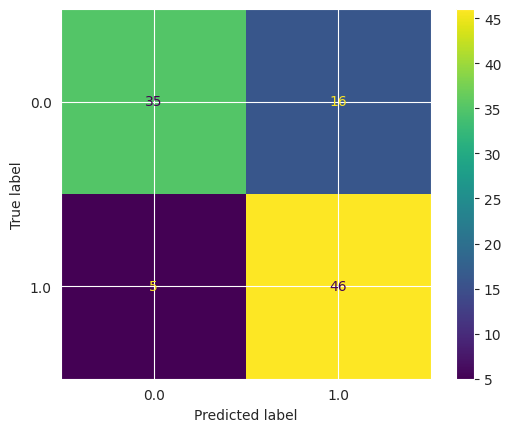

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)

Si quisieramos aplicar el modelo a nuevos datos, tendr√≠amos que preprocesarlo del mismo modo que a los datos de entrenamiento y deber√≠amos transformarlo con el TFIDFVectorizar anteriormente entrenado. Despues de eso ya se podr√≠a incorporar sin problemas al `model.predict(Xnew)`

#### Importancia de caracter√≠sticas

In [56]:
# Obtener la importancia de las variables del modelo
importance = model.coef_[0]

In [57]:
# Primero, emparejamos los nombres de las caracter√≠sticas con su importancia
features_importances = list(zip(X_columns, importance))

# Luego, ordenamos las caracter√≠sticas por importancia en orden descendente
features_importances_sorted = sorted(features_importances, key=lambda x: x[1], reverse=True)

# Desempaquetamos las listas ordenadas
X_columns_sorted, importance_sorted = zip(*features_importances_sorted)



Feature: 0, Name: fuck, Score: 1.61244
Feature: 1, Name: wake, Score: 1.52950
Feature: 2, Name: loud, Score: 1.51696
Feature: 3, Name: much, Score: 1.46710
Feature: 4, Name: much noise, Score: 1.38353
Feature: 5, Name: outside, Score: 1.31088
Feature: 6, Name: house, Score: 1.26978
Feature: 7, Name: window, Score: 1.16027
Feature: 8, Name: fucking, Score: 1.06960
Feature: 9, Name: constant, Score: 1.05028
Feature: 10, Name: url url, Score: -1.03232
Feature: 11, Name: complaint, Score: -1.05313
Feature: 12, Name: white, Score: -1.08486
Feature: 13, Name: noise pollution, Score: -1.08962
Feature: 14, Name: pollution, Score: -1.13294
Feature: 15, Name: bring, Score: -1.14338
Feature: 16, Name: rain, Score: -1.31047
Feature: 17, Name: num_URLS, Score: -1.61193
Feature: 18, Name: love, Score: -1.90010
Feature: 19, Name: url, Score: -6.66525


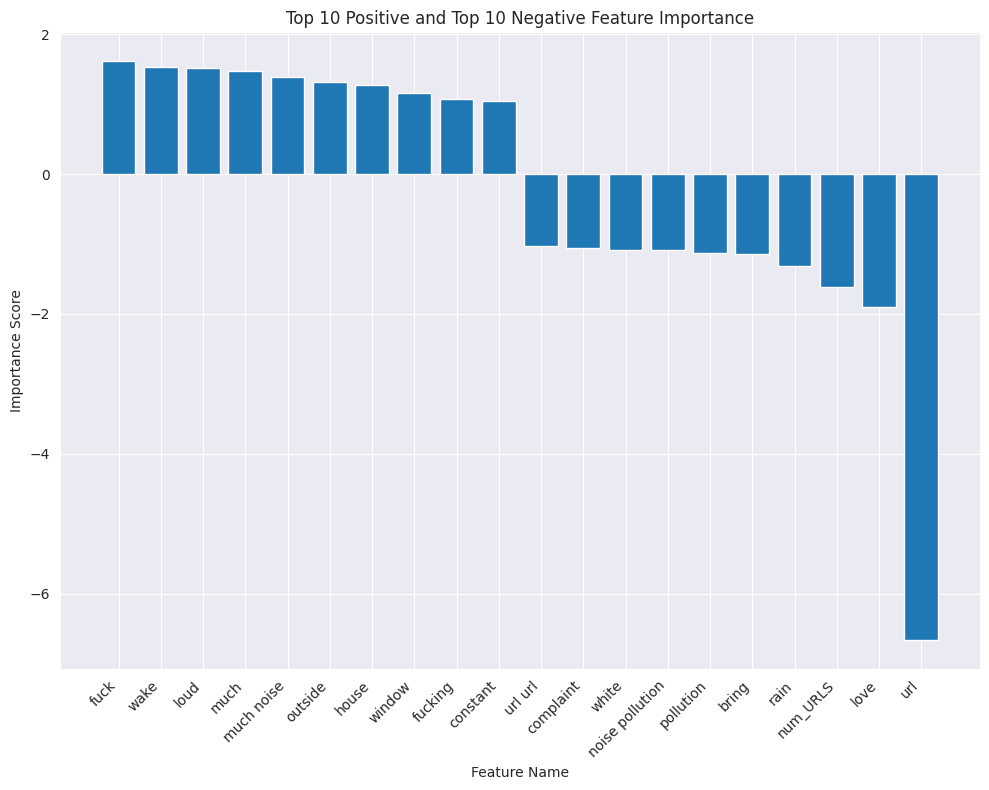

In [58]:

# Seleccionamos solo las 10 m√°s positivas y las 10 m√°s negativas
top_features = X_columns_sorted[:10] + X_columns_sorted[-10:]
top_importance = importance_sorted[:10] + importance_sorted[-10:]

# Mostrar el n√∫mero de la caracter√≠stica, con su nombre, y su score de importancia
for i, (feature, importance) in enumerate(zip(top_features, top_importance)):
    print('Feature: %0d, Name: %s, Score: %.5f' % (i, feature, importance))

# Crear el plot
plt.figure(figsize=(10, 8))  # Ajusta el tama√±o del gr√°fico seg√∫n necesites
plt.bar(top_features, top_importance)  # Usar nombres de caracter√≠sticas ordenadas en el eje x

# Mejorar el gr√°fico
plt.xticks(rotation=45, ha="right")  # Rota los nombres en el eje x para mejor lectura
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.title('Top 10 Positive and Top 10 Negative Feature Importance')
plt.tight_layout()  # Ajusta autom√°ticamente los par√°metros del subplot para que el subplot(s) encaje en el √°rea de la figura.

plt.show()

# Entrenamiento con modelos de lenguaje:


Hasta ahora, hemos construido un clasificador de texto utilizando una t√©cnica cl√°sica de ingenier√≠a de caracter√≠sticas **TF-IDF** . Este enfoque transforma los textos en vectores num√©ricos que representan la importancia de cada palabra en el contexto de los documentos, permitiendo aplicar algoritmos de machine learning tradicionales.

Sin embargo, este enfoque tiene limitaciones como que no capta el **significado contextual** de las palabras, es decir que trata cada palabra como entidades independiantes que aparecen o no en un documento.


Ahora daremos un paso adelante utilizando modelos de lenguaje preentrenados, como los basados en la **arquitectura Transformer**.

Cuando se entrena un modelo de lenguaje utilizando una arquitectura de tipo Transformers se utilizan grandes cantidades de textos para que la red neuronal aprenda patrones, relaciones y estructuras de un idioma. Como hemos visto, el resultado de este proceso se conoce como *modelo pre-entrenado*, que esencialmente es una red neuronal que ha capturado el concimiento general del idioma, permitiendo predecir palabras con eficacia, pero sin capacidades de llevar a cabo tareas espec√≠ficas como la clasificaci√≥n de textos.

El poder de los modelos pre-entrenados radica en su capacidad para ser ajustados o *afinados* y resolver una tarea espec√≠fica como traducci√≥n autom√°tica, resumen de textos, extracci√≥n de informaci√≥n o **clasificaci√≥n de textos**. Este proceso de ajuste se conoce como *fine-tuning*, y cuando se aplica se aprovecha el conocimiento adquirido por el modelo de lenguaje en el pre-entrenamiento para resolver el problema en cuesti√≥n.

Al llevar a cabo el ajuste de un modelo pre-entrenado para resolver un problema de clasificaci√≥n se incorpora una **classification head** que utiliza las representaciones vectoriales generadas por el modelo de lenguaje para ajustar una red neuronal que permita crear predicciones espec√≠ficas de las categor√≠as que queremos predecir asociadas al texto.

Cuando se utiliza la librer√≠a *Transformers* esta capa de clasificaci√≥n es una red neuronal simple, pero podr√≠a utilizarse cualquier otra estructura como un regresor log√≠stico.


## Proceso resumido

Cuando usamos un modelo como **BERT** para tareas de clasificaci√≥n, el flujo b√°sico es el siguiente:

1. **Tokenizasci√≥n**: Primero, el texto se transforma en tokens mediante el tokenizador con el que fue entrenado el modelo de lenguaje. En este proceso se a√±aden los tokens especiales `[CLS]` y `[SEP]`


2. **Paso por el modelo de lenguaje**: El modelo de lenguaje toma como entrada los tokens y devuelve vectores contextuales (embeddings) para cada uno. El embedding asociado al token `[CLS]` captura una especie de "resumen contextualizado" de todo el texto.

3. **Clasification head**: Este vector `[CLS]` se pasa por una o varias capas lineales (una "classification head"), que aprenden a mapear esa representaci√≥n a nuestras clases (por ejemplo, "positivo" o "negativo", en el caso de la imagen.).


4. **Entrenamiento (Fine-tuning)**: Durante el fine-tuning, se ajustan tanto los pesos del modelo de lenguaje como los de la clasificaci√≥n, utilizando nuestros propios datos etiquetados.





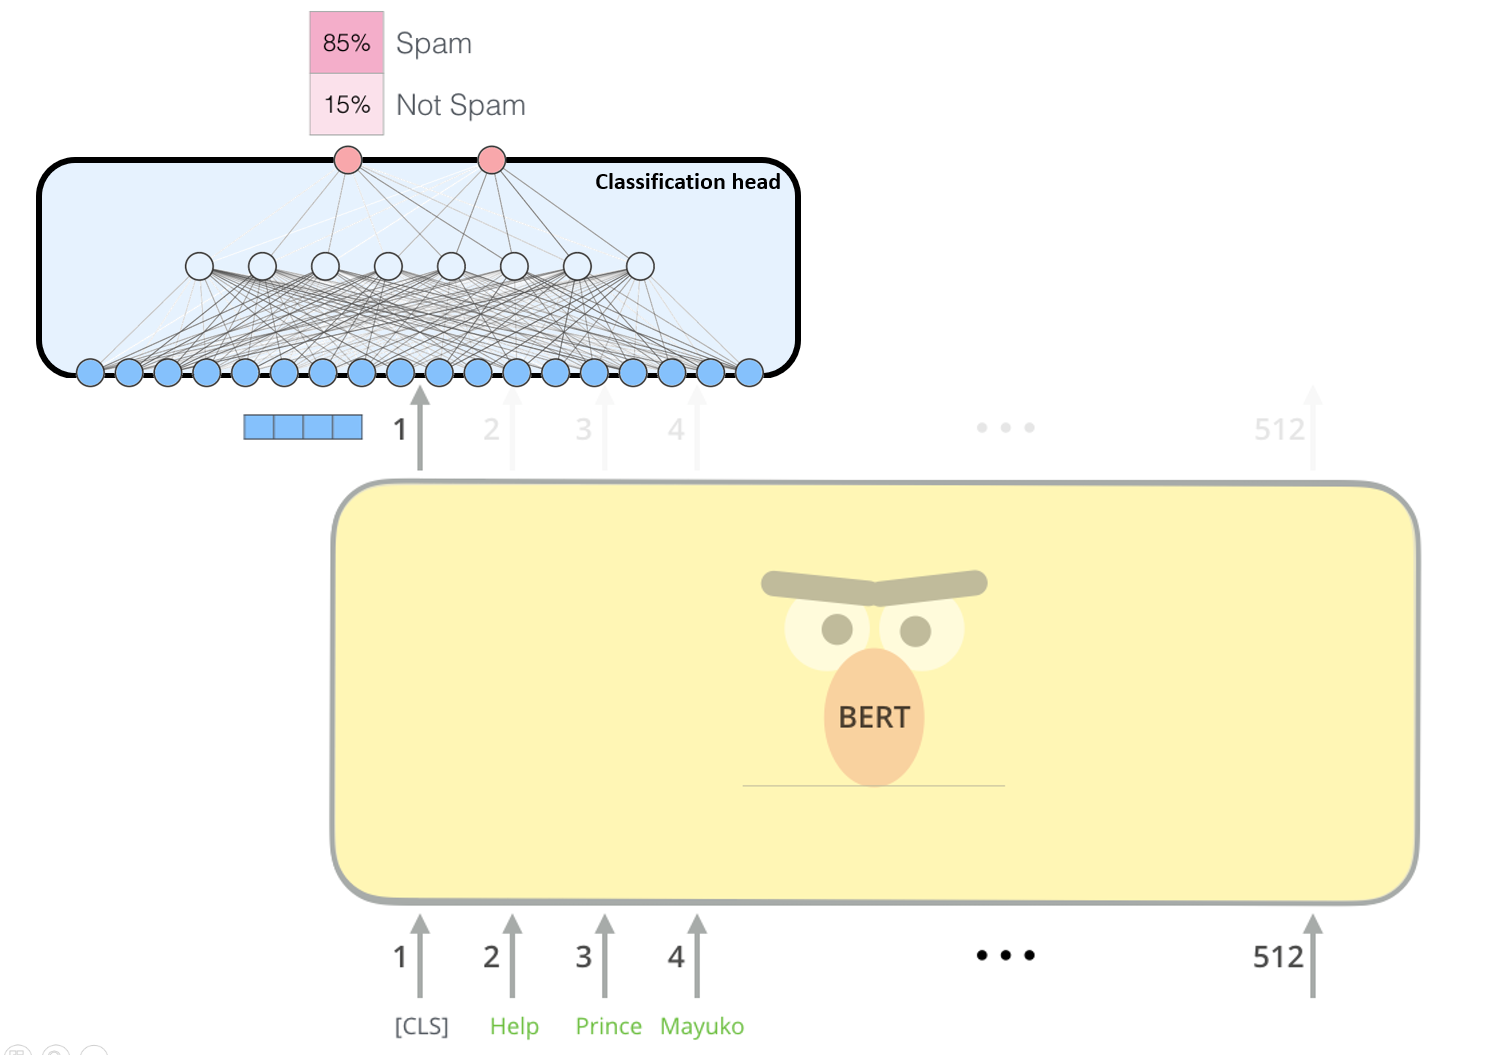

## Descarga y preparaci√≥n de datos

En primer lugar, vamos a convertir el Dataframe utilizado previamente a un objeto de la librer√≠a Huggingface.
Adicionalmente, renombramos la columna `molestia` del objeto Dataset creado a `labels`, que es el nombre est√°ndar que esperan muchos modelos de clasificaci√≥n en Hugging Face.





In [59]:
from datasets import Dataset, DatasetDict, ClassLabel
dataset_hf = Dataset.from_pandas(dataset).rename_column("molestia", "labels")  # from_pandas(dataset).rename_column("molestia", "labels")

Indicamos que la columna `labels` representa una variable categ√≥rica con 2 clases (por ejemplo: 0 = "no queja de ruido", 1 = "queja de ruido"). Esto permite que Hugging Face maneje las etiquetas correctamente durante el entrenamiento y la evaluaci√≥n.

In [60]:
dataset_hf = dataset_hf.cast_column("labels", ClassLabel(num_classes=2))

Casting the dataset:   0%|          | 0/1019 [00:00<?, ? examples/s]

In [61]:
dataset_hf

Dataset({
    features: ['tweet_text', 'labels', 'char_len', 'normalized', 'preprocessed_text', 'num_mention', 'num_URLS', 'num_NUM', 'num_ADJ', '__index_level_0__'],
    num_rows: 1019
})

Dividimos el dataset en train, development y test.

Al entrenar un modelo de lenguaje (o cualquier modelo de machine learning), no podemos evaluar su rendimiento usando los mismos datos con los que lo entrenamos. Por eso, dividimos los datos en tres conjuntos con prop√≥sitos distintos:

- **Train**: Este conjunto se utiliza para ajustar los pesos del modelo. Aqu√≠ es donde el modelo "aprende" a hacer la tarea, minimizando el error en estos ejemplos a trav√©s del proceso de entrenamiento.

- **Development**: Este conjunto, a veces llamado "dev", se usa para evaluar el rendimiento del modelo durante el entrenamiento, pero sin formar parte del entrenamiento directo. Sirve para elegirt los mejores hiperpar√°metros, decidir cuando deter el entrenamiento y comprender si el modelo est√° generalizando bien.

- **Test**: Este conjunto se guarda hasta el final y se usa una sola vez, despu√©s de entrenar y ajustar el modelo.




In [61]:
dasdasdaa

  Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.


In [62]:
# Dividir el conjunto de datos en train y test (80% train, 20% test)
train_testvalid = dataset_hf.train_test_split(test_size=0.2, seed=43, stratify_by_column="labels")

# Dividir el conjunto de test en dev y test (50% dev, 50% test)
test_valid = train_testvalid['test'].train_test_split(test_size=0.5, seed=43, stratify_by_column="labels")


In [63]:
# Crear un DatasetDict con train, dev y test
split_datasets = DatasetDict({
    'train': train_testvalid['train'],
    'test': test_valid['test'],
    'dev': test_valid['train']
})

# Acceder a los conjuntos de datos divididos
train_dataset = split_datasets['train']
dev_dataset = split_datasets['dev']
test_dataset = split_datasets['test']

### Tokenizaci√≥n

Antes de poder ajustar un modelo de lenguaje, necesitamos convertir nuestro texto en un formato que el modelo pueda entender. Esto se hace mediante el uso del tokenizador del modelo de lenguaje



In [64]:
from transformers import (
   AutoConfig,
   AutoTokenizer,
   AutoModelForSequenceClassification
)

En primer lugar, debemos decidir a que modelo de lenguaje queremos hacer el *fine-tuning*. En este caso, como estamos trabajando con textos en ingl√©s utilizaremos el modelo **distilbert**, un modelo de lenguaje ligero ideal para entornos de ense√±anza.

Cargamos el tokenizador con una clase de la librer√≠a Transformers `AutoTokenizer()`, que cargar√° el tokenizador sin tener que preocuparnos de otros par√°metros relativos a su arquitectura.

In [65]:
model_name = 'distilbert/distilbert-base-uncased' #  'distilbert/distilbert-base-uncased'

In [66]:
tokenizer = AutoTokenizer.from_pretrained(model_name) # from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Aqu√≠ vemos c√≥mo el tokenizer divide el texto en subpalabras. Por ejemplo, palabras como "zebras" pueden dividirse en tokens como "zebra" y "##s" si no est√°n en el vocabulario completo del modelo.  Este enfoque permite al modelo manejar cualquier palabra, incluso si no la ha visto durante su preentrenamiento, adem√°s de reducir el tama√±o del vocabulario.

In [67]:
texto = "Cats and zebras love to nap in sunny spots"
texto_tokens = tokenizer(texto).tokens()
texto_tokens

['[CLS]',
 'cats',
 'and',
 'zebra',
 '##s',
 'love',
 'to',
 'nap',
 'in',
 'sunny',
 'spots',
 '[SEP]']

A continuaci√≥n, definimos una funci√≥n de preprocesamiento que tokenice nuestros subsets de datos. Para ello seleccionamos un *padding* con valor **max_length**, que asegura que todos los textos tengan la misma longitud en cada batch. Adem√°s, el valor `truncation=True` corta los textos que no entren en la ventana de contexto del modelo.

In [68]:
def preprocess_function(examples):
    # Tokenizar el texto
    return tokenizer(examples['tweet_text'], padding="max_length", truncation=True)

In [69]:
train_dataset = train_dataset.map(preprocess_function, batched=True) # preprocess_function
dev_dataset = dev_dataset.map(preprocess_function, batched=True) # preprocess_function
test_dataset = test_dataset.map(preprocess_function, batched=True) # preprocess_function

Map:   0%|          | 0/815 [00:00<?, ? examples/s]

Map:   0%|          | 0/102 [00:00<?, ? examples/s]

Map:   0%|          | 0/102 [00:00<?, ? examples/s]

### Fine-tuning

Una vez que tenemos nuestros datos tokenizados, es hora de crear el modelo, configurar los par√°metros de entrenamiento y definir c√≥mo queremos evaluar su rendimiento.



En primer lugar, cargamos el modelo pre-entrenado con una cabeza de clasificaic√≥n que ajustaremos posteriormente utilizando la clase `AutoModelForSequenceClassification()`. Dentro de la clase indicamos que hay 2 categor√≠as, y proporcionamos un mapeo entre los IDs num√©ricos (0, 1) y las etiquetas sem√°nticas ("NO_MOLESTIA", "MOLESTIA"), lo que facilita luego la interpretaci√≥n de resultados.



In [71]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

id2label = {0: "NO_MOLESTIA", 1: "MOLESTIA"}
label2id = {"NO_MOLESTIA": 0, "MOLESTIA": 1}

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels = 2, id2label=id2label, label2id=label2id)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Configuraci√≥n del Entrenamiento del Modelo



A continuaci√≥n, se detallan los principales par√°metros utilizados para entrenar el modelo:

- **learning_rate**: Bajo. Ideal para datasets peque√±os y procesos de *fine-tuning*, ya que permite una adaptaci√≥n m√°s precisa sin grandes saltos en los pesos.

- **eval_strategy="steps"**: Se eval√∫a el modelo cada 50 pasos de entrenamiento, en lugar de al final de cada √©poca. Esto permite una supervisi√≥n m√°s frecuente del rendimiento en validaci√≥n.

- **load_best_model_at_end=True**: Al finalizar el entrenamiento, se carga autom√°ticamente el modelo que haya obtenido la mejor puntuaci√≥n en validaci√≥n.

- **weight_decay**: Se utiliza como t√©cnica de regularizaci√≥n para evitar el sobreajuste (*overfitting*) penalizando grandes valores en los pesos del modelo.

- **logging_steps**: Indica cada cu√°ntos pasos se deben registrar las m√©tricas de entrenamiento. Permite un monitoreo detallado del progreso.

- **output_dir**: Carpeta donde se guardan todos los resultados del entrenamiento, incluidos los checkpoints y el modelo final.


In [72]:
training_args = TrainingArguments(
    output_dir="modelo_test",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=4,
    weight_decay=0.1,
    eval_strategy="steps",
    save_strategy="steps",
    eval_steps=50,
    logging_strategy="steps",
    logging_steps=50,
    load_best_model_at_end=True,
    push_to_hub=False,
    report_to="none"
)


In [ ]:
# Para que hubiera repetibilidad en el entrenamiento
# habr√≠a que fijar una seed en trainingarguments con seed=52

#### Definici√≥n de m√©tricas de evaluaci√≥n


Definiremos dos m√©tricas de evaluaci√≥n que podremos explorar mientras se entrena el modelo: accuracy y f1-score.

In [73]:
import numpy as np
import evaluate

accuracy = evaluate.load("accuracy")
f1_score = evaluate.load("f1")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    accuracy_value = accuracy.compute(predictions=predictions, references=labels)["accuracy"]
    f1_score_value = f1_score.compute(predictions=predictions, references=labels)["f1"]

    return {
        "accuracy": accuracy_value,
        "f1_score": f1_score_value,
    }


#### Entrenamiento


Ya tenemos el modelo, los datos, los argumentos de entrenamiento y la funci√≥n de evaluaci√≥n. Ahora usamos la clase `Trainer`, que se encarga de orquestar el entrenamiento, evaluaci√≥n y guardado del modelo.


- **model**: Nuestro modelo preentrenado, en este caso DistilBERT, al que se le ha a√±adido una cabeza de clasificaci√≥n para tareas de *text classification*.

- **args**: Argumentos de entrenamiento definidos previamente mediante `TrainingArguments`. Incluyen par√°metros como la tasa de aprendizaje, evaluaci√≥n por pasos, n√∫mero de √©pocas, entre otros.

- **train_dataset**: Conjunto de datos utilizado para entrenar el modelo.

- **eval_dataset**: Conjunto de validaci√≥n que se utiliza para evaluar el rendimiento del modelo durante el proceso de entrenamiento.

- **tokenizer**: El tokenizador asociado al modelo. Se incluye para que el modelo pueda guardarse junto con la informaci√≥n necesaria para preprocesar nuevos textos posteriormente.

- **compute_metrics**: Funci√≥n personalizada que define c√≥mo se calculan las m√©tricas de evaluaci√≥n, como *accuracy*, *precision*, *recall* o *F1-score*.

In [74]:
trainer = Trainer(
    model=model,  # model
    args=training_args,  # training_args
    train_dataset=  train_dataset,  # train_dataset
    eval_dataset= dev_dataset,  # dev_dataset
    tokenizer=tokenizer ,# tokenizer
    compute_metrics= compute_metrics, # compute_metrics
    #callbacks=[EarlyStoppingCallback(early_stopping_patience=2) # Podriamoshacer une arly stop
)

In [75]:
trainer.train()  #train()

TrainOutput(global_step=408, training_loss=0.24437460894970334, metrics={'train_runtime': 175.387, 'train_samples_per_second': 18.587, 'train_steps_per_second': 2.326, 'total_flos': 431843719618560.0, 'train_loss': 0.24437460894970334, 'epoch': 4.0})

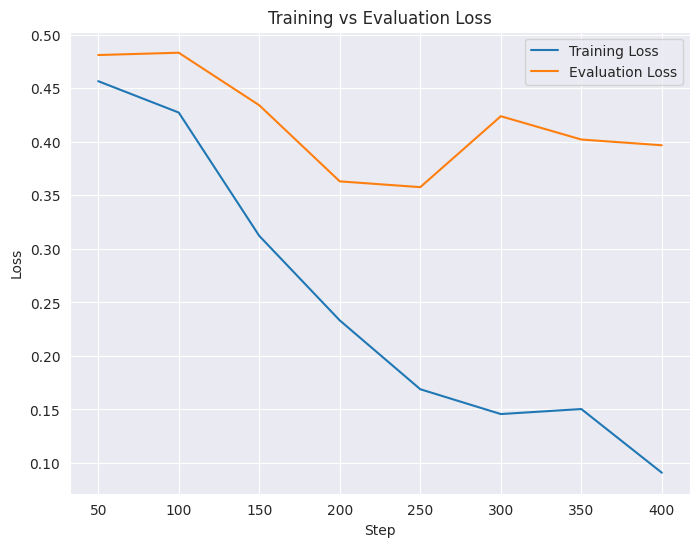

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraemos los logs de entrenamiento
history = pd.DataFrame(trainer.state.log_history)

# A veces los logs pueden tener pasos donde no se eval√∫a. Filtramos filas con 'loss' y 'eval_loss'
train_loss = history[history['loss'].notna()][['step', 'loss']]
eval_loss = history[history['eval_loss'].notna()][['step', 'eval_loss']]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_loss['step'], train_loss['loss'], label='Training Loss')
plt.plot(eval_loss['step'], eval_loss['eval_loss'], label='Evaluation Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training vs Evaluation Loss')
plt.legend()
plt.grid(True)
plt.show()


Una vez entrenado el modelo, podemos guardarlo en local:

In [77]:
trainer.save_model("output_model_save")  # save_model("output_model_save")

Tambi√©n podr√≠amos subirlo al Hub de HuggingFace con el m√©todo `.push_to_hub()`



```
trainer.push_to_hub(commit_message="Training completed!")
```



### Evaluaci√≥n

Una vez entrenado el modelo, llevaremos a cabo su evaluaci√≥n.

El objeto `Trainer()` tiene un m√©todo `.evaluate()` que permite introducir un conjunto de datos de evaluaci√≥n y obtener las m√©tricas accuracy y f1 definidas previamente.

In [78]:
trainer.evaluate(test_dataset) # evaluate(test_dataset)

{'eval_loss': 0.3723747432231903,
 'eval_accuracy': 0.8725490196078431,
 'eval_f1_score': 0.8737864077669902,
 'eval_runtime': 1.8014,
 'eval_samples_per_second': 56.623,
 'eval_steps_per_second': 7.217,
 'epoch': 4.0}

Tambi√©n vamos a hacer un classification report para ver los scores relativo a cada categor√≠a. Para eso, predeciremos las etiquetas sobre el test set con el m√©todo `.predict()`. Y obtendremos la etiqueta de cada predicci√≥n.

In [79]:
predictions = trainer.predict(test_dataset)  # predict(test_dataset)

In [80]:
y_pred = predictions.predictions.argmax(axis=1)
y_true = [x["labels"] for x in test_dataset]

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_true,y_pred))
print(classification_report(y_true,y_pred))

[[44  7]
 [ 6 45]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        51
           1       0.87      0.88      0.87        51

    accuracy                           0.87       102
   macro avg       0.87      0.87      0.87       102
weighted avg       0.87      0.87      0.87       102




```
  [[35 16]
  [ 6 45]]
```


```

              precision    recall  f1-score   support

         0.0       0.85      0.69      0.76        51
         1.0       0.74      0.88      0.80        51

    accuracy                           0.78       102
   macro avg       0.80      0.78      0.78       102
weighted avg       0.80      0.78      0.78       102

```

### Reutilizaci√≥n

Una de las mayores fortalezas del ecosistema Hugging Face es que **todo el flujo est√° unificado y estandarizado**: entrenamos un modelo, lo guardamos, y luego podemos volver a cargarlo en una sola l√≠nea con la clase `pipeline()`.

Esto nos permite reutilizar el modelo sin tener que preocuparnos en el procesado del texto, pudiendo hacer inferencias de forma r√°pida y construir prototipos r√°pidos.



In [82]:
from transformers import pipeline

# Cargar el modelo y el tokenizer directamente desde el directorio guardado
modelo_clasificacion = pipeline("text-classification", model="/content/output_model_save", tokenizer=model_name)


Device set to use cuda:0


In [83]:
texto_nuevo_noqueja = "I feel so lucky that today is about the quietest its ever been here. Fewer copters, no construction noise. Ahhhhhhhhh #selfcare https://t.co/7Ka4M6wFQv"
texto_nuevo_queja = "OMG!! üò© I can't stand it when the neighbor starts mowing the lawn at 6 AM on Sundays üò§üåæüîä"

print(modelo_clasificacion(texto_nuevo_noqueja))
print(modelo_clasificacion(texto_nuevo_queja))

[{'label': 'NO_MOLESTIA', 'score': 0.9922921061515808}]
[{'label': 'MOLESTIA', 'score': 0.9889703989028931}]
